# Assignment 7
## Due June 4th
### names:

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.linear_model import Ridge

np.random.seed(42)


#Creater a folder for images
path = os.path.dirname(os.path.abspath('Assignment7_bodden.ipynb')) + '\Images'
if not os.path.exists(path):
    os.makedirs(path)
np.random.seed(42)

## Exercise 1)

In [51]:
def get_data(n):
        
    X = np.random.uniform(0,2, n)
    xs = np.expand_dims(X, axis=-1)
    ys = 2 * np.sin(4*X) + 0.1*np.random.normal(0, 2, n)
    ys = np.expand_dims(ys, axis=-1)
    
    return xs, ys

In [52]:
def plot_regression(ax, clf, xs):
    
    xs_plot = np.linspace(np.min(xs), np.max(xs), 10000)[:, None]
    ys_pred = clf.predict(xs_plot)
    ax.scatter(xs_plot, ys_pred, c='lightblue', linewidth=0.1, cmap=plt.cm.coolwarm, alpha=0.8)

In [63]:
def plot_regression_with_feature_map(ax, clf, xs, feature_map):
    
    xs_plot = np.linspace(np.min(xs), np.max(xs), 10000)[:, None]
    ys_pred = clf.predict(feature_map(xs_plot))
    ax.scatter(xs_plot, ys_pred, c='lightblue', linewidth=0.1, cmap=plt.cm.coolwarm, alpha=0.8)

In [54]:
xs, ys = get_data(200)

### a)

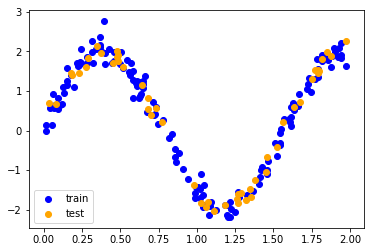

In [55]:
xs_train = xs[:150]
ys_train = ys[:150]

xs_test = xs[150:]
ys_test = ys[150:]

plt.scatter(xs_train, ys_train, c ='blue')
plt.scatter(xs_test, ys_test, c = 'orange')
plt.legend(['train', 'test'])
plt.savefig('Images/3a.png')

### b)

Starting kernel ridge regression with rbf kernel.
Score: 0.9844074258597482


c:\users\megamind\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


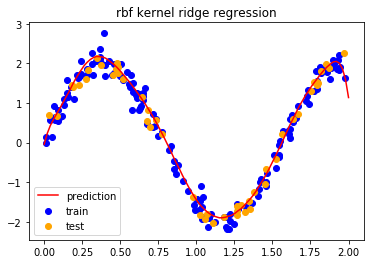

Starting kernel ridge regression with linear kernel.
Score: -0.09946872655454997


c:\users\megamind\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Starting kernel ridge regression with poly kernel.
Score: 0.5105239257720536


c:\users\megamind\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


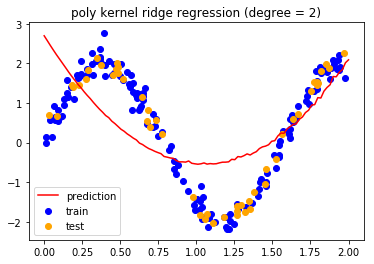

Starting kernel ridge regression with poly kernel.
Score: 0.7576626850400472


c:\users\megamind\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


In [56]:
models = [KernelRidge(kernel='rbf', alpha=0),
          KernelRidge(kernel='linear', alpha=0),
          KernelRidge(kernel='poly', alpha=0, degree=2),
          KernelRidge(kernel='poly', alpha=0, degree=3)]

x_plot = np.expand_dims(np.linspace(0, 2, 100), axis=-1)

for m in models:
    print('Starting kernel ridge regression with {} kernel.'.format(m.kernel))
    m.fit(xs_train, ys_train)
    
    print('Score: {}'.format(m.score(xs_test, ys_test)))
    
    
    plt.scatter(xs_train, ys_train, c ='blue')
    plt.scatter(xs_test, ys_test, c = 'orange')    
    plt.plot(x_plot, m.predict(x_plot), c = 'red')
    
    plt.legend(['prediction', 'train', 'test'])
    
    savepath = 'Images/3b_{}'.format(m.kernel)
    title = '{} kernel ridge regression'.format(m.kernel)
    
    if m.kernel =='poly' : 
        savepath += '_{}'.format(m.degree)
        title += ' (degree = {})'.format(m.degree)
        
    plt.title(title)
    plt.savefig(savepath)
    plt.show()

### c)

Starting kernel ridge regression with rbf kernel.
Score: 0.9103077562891603


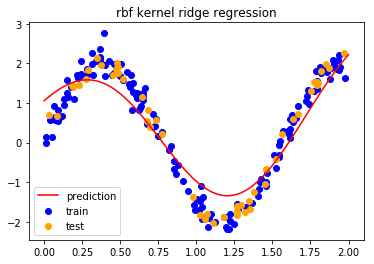

Starting kernel ridge regression with linear kernel.
Score: -0.053444230270921045


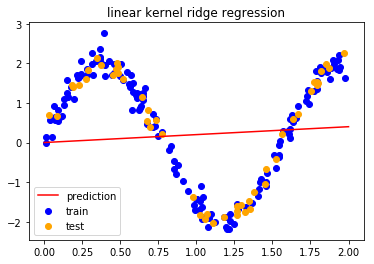

Starting kernel ridge regression with poly kernel.
Score: 0.45744508802893125


Starting kernel ridge regression with poly kernel.
Score: 0.778864095131847


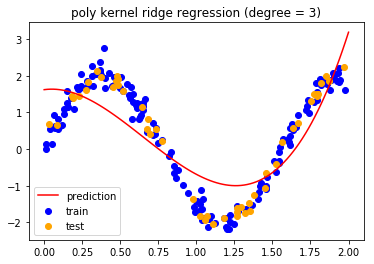

In [57]:
models = [KernelRidge(kernel='rbf', alpha=1),
          KernelRidge(kernel='linear', alpha=1),
          KernelRidge(kernel='poly', alpha=1, degree=2),
          KernelRidge(kernel='poly', alpha=1, degree=3)]

x_plot = np.expand_dims(np.linspace(0, 2, 100), axis=-1)

for m in models:
    print('Starting kernel ridge regression with {} kernel.'.format(m.kernel))
    m.fit(xs_train, ys_train)
    
    print('Score: {}'.format(m.score(xs_test, ys_test)))
    
    
    plt.scatter(xs_train, ys_train, c ='blue')
    plt.scatter(xs_test, ys_test, c = 'orange')    
    plt.plot(x_plot, m.predict(x_plot), c = 'red')
    
    plt.legend(['prediction', 'train', 'test'])
    
    savepath = 'Images/3c_{}'.format(m.kernel)
    title = '{} kernel ridge regression'.format(m.kernel)
    
    if m.kernel =='poly' : 
        savepath += '_{}'.format(m.degree)
        title += ' (degree = {})'.format(m.degree)
        
    plt.title(title)
    plt.savefig(savepath)
    plt.show()

### d)

c:\users\megamind\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


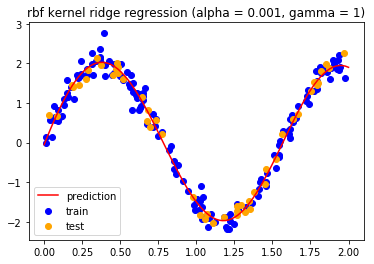

In [58]:
parameters = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

x_plot = np.expand_dims(np.linspace(0, 2, 100), axis=-1)

grid = GridSearchCV(KernelRidge(kernel='rbf'), parameters)
grid.fit(xs_train, ys_train)

plt.scatter(xs_train, ys_train, c ='blue')
plt.scatter(xs_test, ys_test, c = 'orange')    
plt.plot(x_plot, grid.predict(x_plot), c = 'red')
    
plt.legend(['prediction', 'train', 'test'])

best_alpha = grid.best_estimator_.get_params()['alpha']
best_gamma = grid.best_estimator_.get_params()['gamma']
plt.title('rbf kernel ridge regression (alpha = {}, gamma = {})'.format(best_alpha, best_gamma))
plt.savefig('Images/3d.png')
plt.show()



### e)

In [59]:
def feature_map_poly2(xs):
    
    """
    Compute the feature map for poly2 kernel (<x, y> + 1)^2.
   
    xs: n x 1 array
    return: n x 3 array with the value of the feature map
    """
    
    ones = np.ones_like(xs)
    
    return np.hstack([ones, np.sqrt(2) * xs, xs ** 2])

Poly kernel ridge regression score: 0.45744508802893125
Feature map kernel ridge regression score: 0.4692409324154636


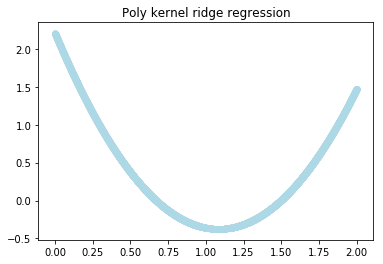

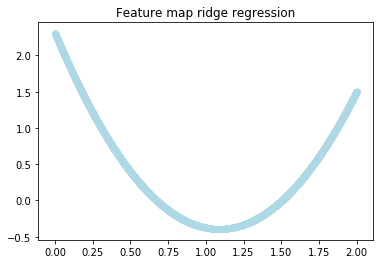

In [68]:
poly_kernel_ridge = KernelRidge(kernel='poly', degree = 2)
poly_kernel_ridge.fit(xs_train, ys_train)

print('Poly kernel ridge regression score: {}'.format(poly_kernel_ridge.score(xs_test, ys_test)))

fig, ax = plt.subplots()
plot_regression(ax, poly_kernel_ridge, x_plot)
plt.title('Poly kernel ridge regression')
plt.savefig('Images/3e_kernel.png')


omega_train = feature_map_poly2(xs_train)

omega_test = feature_map_poly2(xs_test)

feature_kernel_ridge = Ridge()
feature_kernel_ridge.fit(omega_train, ys_train)

print('Feature map kernel ridge regression score: {}'.format(feature_kernel_ridge.score(omega_test, ys_test)))

fig, ax = plt.subplots()
plot_regression_with_feature_map(ax, feature_kernel_ridge, x_plot, feature_map_poly2)
plt.title('Feature map ridge regression')
plt.savefig('Images/3e_feature_map.png')
